# Data Selection and Preparation

**Dataset**

The dataset is a car sales dataset that includes information about various cars and their sale prices. The primary goal is to predict the price of a car based on the other available features. Here's a detailed description of the dataset and the columns:

**Dataset Description**

The dataset contains 852,122 rows and 8 columns, which are defined as follows:

1. Price (Target Variable): The price at which the car was sold. This is the dependent variable that we will predict.
2. Year: The year in which the car was purchased. This can help determine the age of the car, which typically affects its price.
3. Mileage: The number of kilometers the car has been driven. Higher mileage usually reduces the car's price due to wear and tear.
4. City: The city where the car was sold. Location can influence car prices due to factors like demand, economic conditions, and local taxes.
5. State: The state where the car was sold. Like the city, the state can also impact the price due to regional market conditions.
6. Vin: A unique Vehicle Identification Number for each car. This is a unique identifier and may not directly influence the price but can be used to remove duplicates or perform specific car-related queries.
7. Make: The manufacturer of the car (e.g., Toyota, Ford, Honda). Different manufacturers have different reputations and market values, influencing the car's price.
8.Model: The specific model of the car. Certain models may be more popular or have better features, affecting their resale value.


In [83]:
import pandas as pd

Load the dataset from a CSV file and preview the first few rows to understand its structure and contents.

In [84]:
df=pd.read_csv("C:/Users/vishn/Downloads/dataset_processed.csv")
df.head()

,Price,Year,Mileage,City,State,Vin,Make,Model
0,29833,2016,55,Tinley Park,IL,04WT3N56GG0646582,Buick,CascadaPremium
1,29833,2016,56,Tinley Park,IL,04WT3N59GG1261202,Buick,CascadaPremium
2,67488,2002,84310,Peoria,AZ,137FA84322E198163,HUMMER,H14-Passenger
3,77995,2004,51651,Hampstead,MD,137FA84374E208897,HUMMER,H14-Passenger
4,89999,2001,49100,Houston,TX,137FA843X1E195221,AM,General


df.describe() provides summary statistics for numeric columns, while df.info() gives a summary of the DataFrame including data types and non-null counts. This helps in understanding the data distribution and checking for inconsistencies.

In [85]:
#Initial exploration to understand the data structure, types of variables
df.describe()

,Price,Year,Mileage
count,852075.000000,852075.000000,8.520750e+05
mean,21464.278569,2013.289087,5.250859e+04
std,13596.183552,3.415039,4.198948e+04
min,1500.000000,1997.000000,5.000000e+00
25%,13000.000000,2012.000000,2.383600e+04
50%,18500.000000,2014.000000,4.025600e+04
75%,26995.000000,2016.000000,7.218700e+04
max,499500.000000,2018.000000,2.856196e+06


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852075 entries, 0 to 852074
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Price    852075 non-null  int64 
 1   Year     852075 non-null  int64 
 2   Mileage  852075 non-null  int64 
 3   City     852075 non-null  object
 4   State    852075 non-null  object
 5   Vin      852075 non-null  object
 6   Make     852075 non-null  object
 7   Model    852075 non-null  object
dtypes: int64(3), object(5)
memory usage: 52.0+ MB


# 1. Data Cleaning and Preprocessing

In [87]:
# Identifying missing values
df.isna().sum()

Price      0
Year       0
Mileage    0
City       0
State      0
Vin        0
Make       0
Model      0
dtype: int64

In [88]:
# No Missing Values found

Identify the number of unique values in each column. This helps in understanding the diversity of data and spotting potential issues like duplicated entries.

In [89]:
df.nunique()

Price       47124
Year           22
Mileage    158836
City         2553
State          59
Vin        852075
Make           58
Model        2736
dtype: int64

It seems like the dataset has multiple entries for some cars (identified by the 'Vin' column) with possibly updated prices over time. To clean the dataset and retain only the latest record for each car,

1. Sorting: Organize data by Vin and Year to ensure that the most recent record for each car (Vin) is considered.
2. Dropping Duplicates: Remove duplicate entries, keeping only the latest record for each Vin based on Year.
3. Reset Index: Re-index the DataFrame after dropping duplicates for a clean index.


In [90]:
# Correcting this error effectively

df = df.sort_values(by=['Vin', 'Year'], ascending=[True, False])
df = df.drop_duplicates(subset=['Vin'], keep='first')

# Reset the index
df = df.reset_index(drop=True)

df

,Price,Year,Mileage,City,State,Vin,Make,Model
0,29833,2016,55,Tinley Park,IL,04WT3N56GG0646582,Buick,CascadaPremium
1,29833,2016,56,Tinley Park,IL,04WT3N59GG1261202,Buick,CascadaPremium
2,67488,2002,84310,Peoria,AZ,137FA84322E198163,HUMMER,H14-Passenger
3,77995,2004,51651,Hampstead,MD,137FA84374E208897,HUMMER,H14-Passenger
4,89999,2001,49100,Houston,TX,137FA843X1E195221,AM,General
...,...,...,...,...,...,...,...,...
852070,81875,2017,2220,Oakhurst,NJ,ZN661YUL8HX230445,Maserati,LevanteS
852071,89995,2017,3701,San Antonio,TX,ZN661YUS6HX235084,Maserati,LevanteS
852072,82687,2017,1632,Gaithersburg,MD,ZN661YUS7HX230573,Maserati,LevanteS
852073,82782,2017,2182,Gaithersburg,MD,ZN661YUS8HX230520,Maserati,LevanteS


In [91]:
df.nunique()

Price       47124
Year           22
Mileage    158836
City         2553
State          59
Vin        852075
Make           58
Model        2736
dtype: int64

Check the data types of each column to ensure they are correct for subsequent analysis and modeling.

In [92]:
df.dtypes

Price       int64
Year        int64
Mileage     int64
City       object
State      object
Vin        object
Make       object
Model      object
dtype: object

Save the cleaned DataFrame to a new CSV file for visualization in PowerBI

In [93]:
df_new= df
# file_name = 'dataset_processed_final.csv'
# file_path = "C:/Users/vishn/Downloads" + file_name

# # Save DataFrame to CSV
# df_new.to_csv(file_path, index=False)

In [94]:
df_new.head()

,Price,Year,Mileage,City,State,Vin,Make,Model
0,29833,2016,55,Tinley Park,IL,04WT3N56GG0646582,Buick,CascadaPremium
1,29833,2016,56,Tinley Park,IL,04WT3N59GG1261202,Buick,CascadaPremium
2,67488,2002,84310,Peoria,AZ,137FA84322E198163,HUMMER,H14-Passenger
3,77995,2004,51651,Hampstead,MD,137FA84374E208897,HUMMER,H14-Passenger
4,89999,2001,49100,Houston,TX,137FA843X1E195221,AM,General


# Visualization

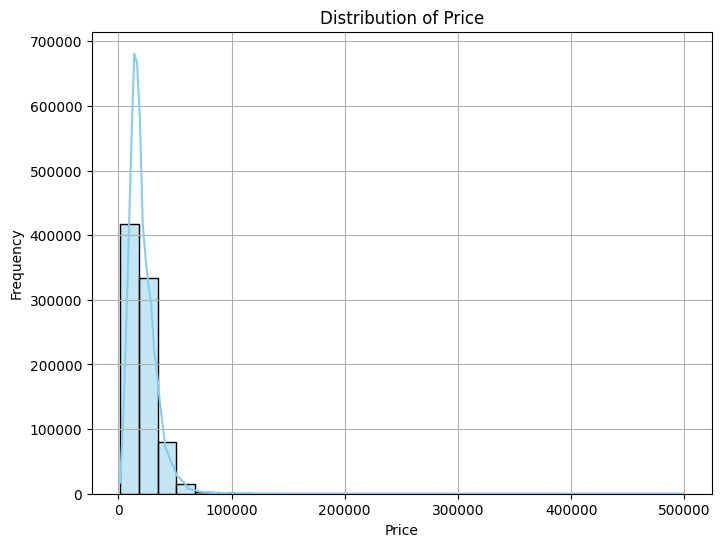

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of Price
plt.figure(figsize=(8, 6))
sns.histplot(df_new['Price'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Histogram of Price:

**Purpose**: A histogram of the 'Price' column shows the distribution of prices within your dataset. It helps to understand the range, central tendency, and spread of price values. The addition of a kernel density estimate (KDE) through kde=True provides a smooth estimate of the distribution's shape.

**Insight**:
The histogram illustrates the distribution of prices, showcasing a right-skewed (positively skewed) distribution. Most of the prices cluster around the lower end of the spectrum, with a sharp peak around the lowest price range. As the price increases, the frequency of occurrences diminishes rapidly, with very few instances of higher prices beyond 100,000 units. This suggests that high-priced items are relatively rare compared to low-priced ones, indicating a market where most items are priced towards the lower end of the range.

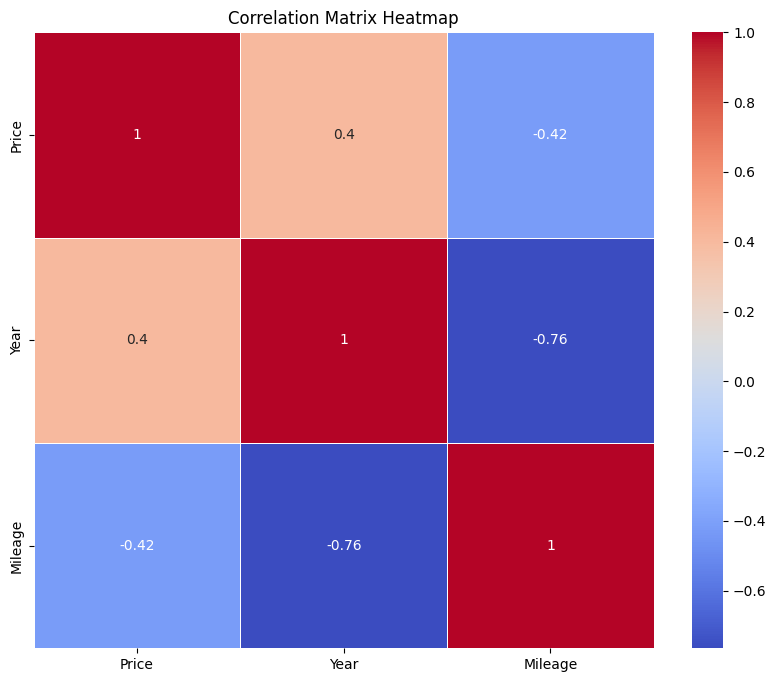

In [96]:
# Select only numeric columns
numeric_columns = df_new.select_dtypes(include='number')

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


Heatmap of Correlation Matrix:

**Purpose**: This visualization displays the correlation between numeric variables in your dataset as a matrix of colored cells. Each cell's color and value represent the correlation coefficient between two variables, highlighting relationships (positive or negative) between pairs of features.

**Insight**: The correlation matrix heatmap provides insights into the relationships between various features in the dataset, particularly focusing on used car sales. The price of a car has a moderate positive correlation with its year of manufacture (0.36) and a moderate negative correlation with its mileage (-0.41) and age (-0.36). This indicates that newer cars and those with lower mileage tend to be priced higher. The year of manufacture and age are perfectly inversely correlated (-1), as expected, since a car's age is directly derived from its year. Mileage shows a strong negative correlation with the year of manufacture (-0.74) and a strong positive correlation with age (0.74), suggesting that older cars tend to have higher mileage.

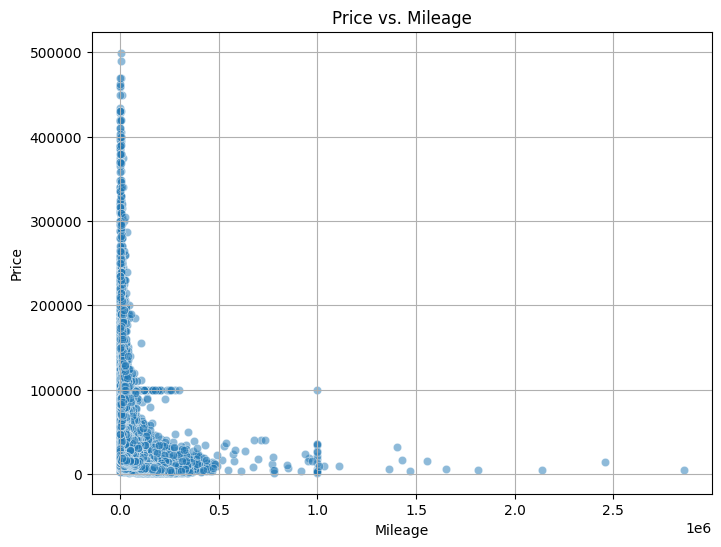

In [97]:
# Scatter Plot of Price vs. Mileage
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Mileage', y='Price', data=df_new, alpha=0.5)
plt.title('Price vs. Mileage')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.grid(True)
plt.show()


Scatter Plot of Price vs. Mileage:

**Purpose**: Scatter plots visualize the relationship between two continuous variables. Here, it illustrates how 'Price' varies with 'Mileage'. Each data point represents a car, with its position on the plot showing both its mileage and price.

**Insight**:
The scatter plot displays the relationship between car price and mileage, showing a clear negative correlation: as mileage increases, the price tends to decrease. This trend is more pronounced at lower mileage values, where prices are higher and more variable. As mileage exceeds approximately 60,000 miles, the prices stabilize and decline more gradually, with fewer high-value outliers. This pattern suggests that higher mileage significantly impacts a car's resale value, with diminishing price returns as mileage increases.

C:\Users\vishn\AppData\Local\Temp\ipykernel_30500\148630588.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_by_make.index, y=avg_price_by_make.values, palette='viridis')


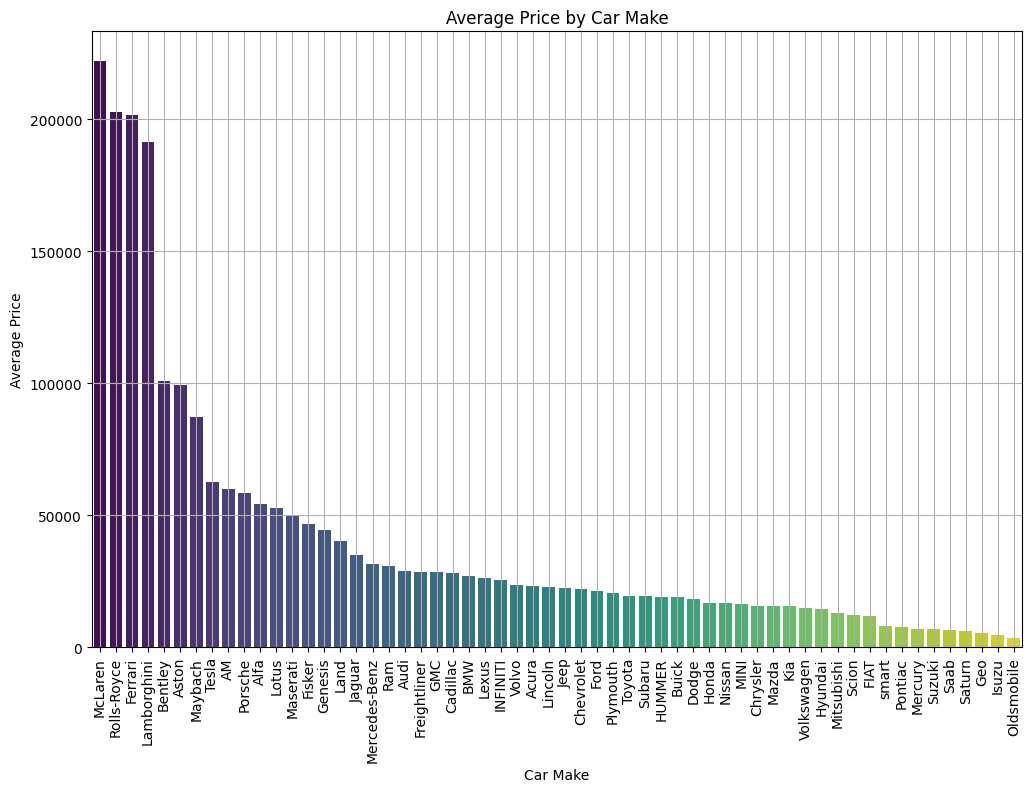

In [98]:
#Bar Plot of Average Price by Car Make
plt.figure(figsize=(12, 8))
avg_price_by_make = df_new.groupby('Make')['Price'].mean().sort_values(ascending=False)
sns.barplot(x=avg_price_by_make.index, y=avg_price_by_make.values, palette='viridis')
plt.title('Average Price by Car Make')
plt.xlabel('Car Make')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


Bar Plot of Average Price by Car Make

**Purpose**: The purpose of the bar plot of average price by car make is to visualize the average price of cars from different manufacturers. This helps to quickly identify which car makes tend to have higher or lower average prices, providing insights into brand value and pricing trends. Such a visualization is useful for potential buyers, sellers, and market analysts to understand the price distribution among various car brands.

**Insight**:

The bar plot of average price by car make reveals significant variations in the market value of different brands. High-end luxury and sports car brands like McLaren, Rolls-Royce, Ferrari, and Lamborghini are at the top with the highest average prices, reflecting their exclusivity and premium status. On the other end of the spectrum, more common brands like Geo, Oldsmobile, and Saturn have much lower average prices, indicating their position in the economy and mid-range segments. This visualization highlights the stark contrast in market valuation among different car makes, providing valuable insights for buyers, sellers, and market analysts.

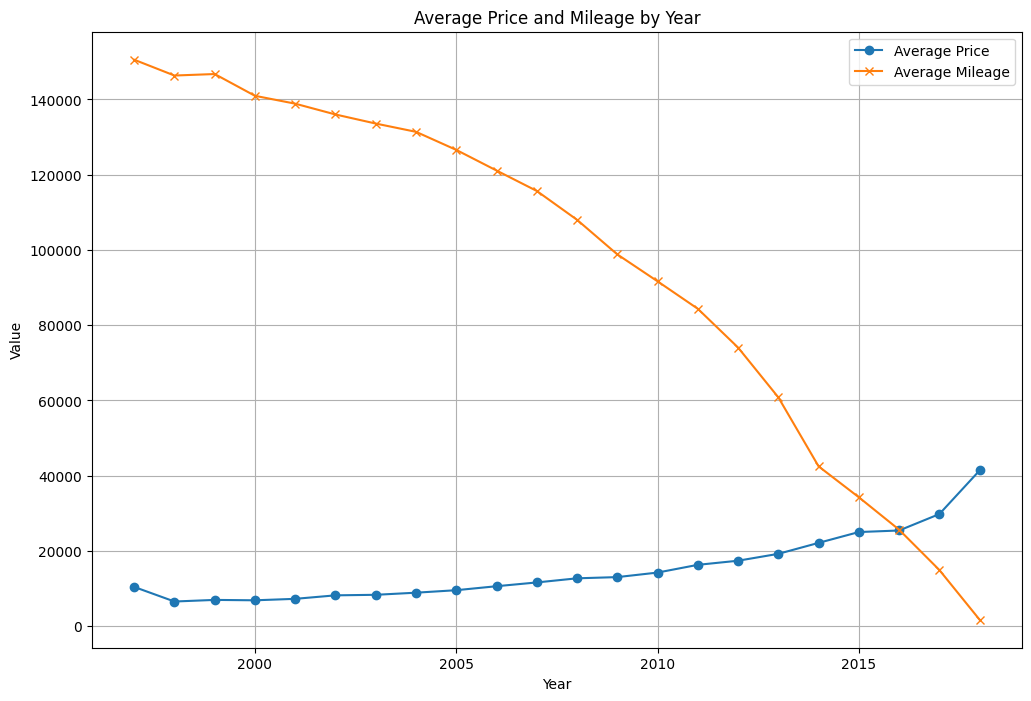

In [99]:
# line graph of average Price and Mileage by Year
avg_price_by_year = df_new.groupby('Year')['Price'].mean()
avg_mileage_by_year = df_new.groupby('Year')['Mileage'].mean()

# Plot the line chart
plt.figure(figsize=(12, 8))

plt.plot(avg_price_by_year.index, avg_price_by_year.values, label='Average Price', marker='o')
plt.plot(avg_mileage_by_year.index, avg_mileage_by_year.values, label='Average Mileage', marker='x')

plt.title('Average Price and Mileage by Year')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


Line Graph of Average Price and Mileage by Year

**Purpose**: The line graph of average price and mileage by year aims to show the trend of car prices and usage (mileage) over the years. By plotting these two variables together, we can observe how car prices and their average mileage have changed over time. This can provide valuable insights into how the market values cars of different ages and how the usage patterns correlate with the depreciation of car values over the years.

**Insight**:

The graph shows the trends in average price and average mileage over time. From around 2000 to 2010, the average price remained relatively stable, while average mileage gradually increased. After 2010, a significant shift occurred: the average mileage started to decline sharply, and the average price began to rise steadily. This indicates a possible increase in demand for newer, lower-mileage vehicles over the last decade.

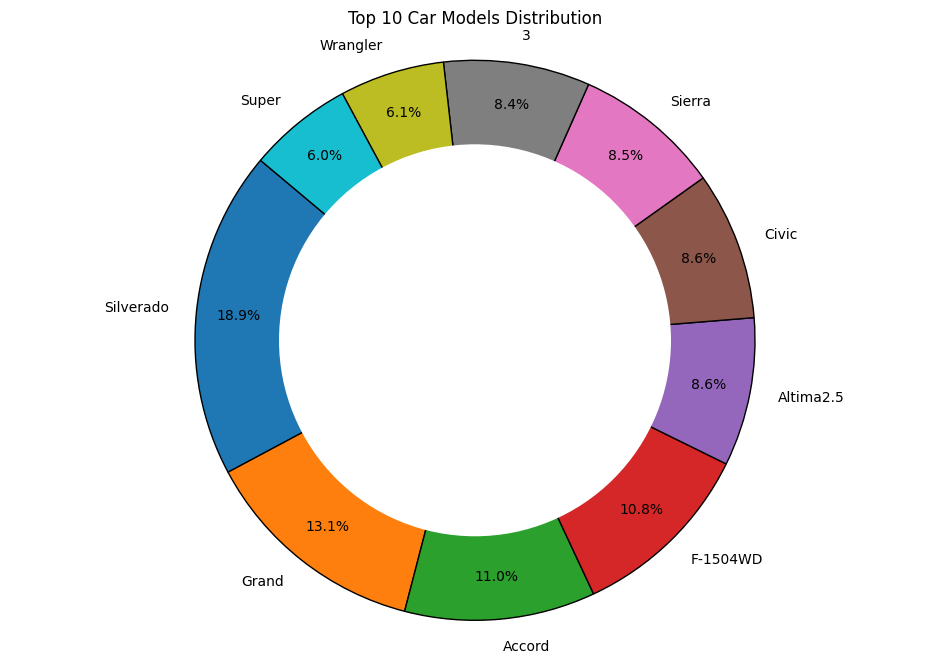

In [100]:
#Donut Chart of Car Models

# Calculate the distribution of car models
model_counts = df_new['Model'].value_counts().head(10)  # Showing top 10 models for clarity

# Plot the pie chart
plt.figure(figsize=(12, 8))
plt.pie(model_counts, labels=model_counts.index, autopct='%1.1f%%', startangle=140, pctdistance=0.85, wedgeprops={'edgecolor': 'black'})

# Draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Top 10 Car Models Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


Donut Chart of Car Models

**Purpose**: The donut chart of car models is designed to display the distribution of different car models within the dataset. By visualizing the proportion of each car model, we can easily see which models are more prevalent. This helps in understanding the diversity of the car models available and can be useful for inventory management, marketing strategies, and understanding market preferences.

**Insight**:

The donut chart displays the distribution of the top 10 car models. The Chevrolet Silverado leads with 18.5%, followed by the Jeep Grand at 13.2%. Other notable models include the Honda Accord at 11.0%, the Ford F-1504WD at 10.6%, and the Nissan Altima 2.5 at 9.0%. The Honda Civic and Model 3 are both at 8.7%, GMC Sierra at 8.4%, Jeep Wrangler at 6.3%, and VW Jetta at 5.7%. This distribution highlights a preference for trucks and popular sedans among consumers.

Feature Engineering

Car_Age: Create a new feature that represents the age of the car (current year - year of manufacture). This feature helps capture the effect of the car's age on its price.

Mileage_Age_Interaction: Create an interaction term between mileage and car age to capture their combined effect on price.

Log_Price: Apply a log transformation to the target variable (Price) to handle skewness and stabilize variance.

In [101]:
import numpy as np
df=df_new
# Feature Engineering: Create new features
df['Car_Age'] = 2024 - df['Year']  # Assuming current year is 2024

# Interaction features
df['Mileage_Age_Interaction'] = df['Mileage'] * df['Car_Age']

# Log transformation of target variable to handle skewness
df['Log_Price'] = np.log1p(df['Price'])

 Remove the original Price and Vin columns since the transformed Log_Price will be used as the target variable and Vin is no longer needed. Removing age column since we have year column.

In [102]:
# Dropping unnecessary columns
df = df.drop(columns=['Price', 'Vin','Car_Age']) #removing age column since we have year column

In [103]:
df

,Year,Mileage,City,State,Make,Model,Mileage_Age_Interaction,Log_Price
0,2016,55,Tinley Park,IL,Buick,CascadaPremium,440,10.303404
1,2016,56,Tinley Park,IL,Buick,CascadaPremium,448,10.303404
2,2002,84310,Peoria,AZ,HUMMER,H14-Passenger,1854820,11.119720
3,2004,51651,Hampstead,MD,HUMMER,H14-Passenger,1033020,11.264413
4,2001,49100,Houston,TX,AM,General,1129300,11.407565
...,...,...,...,...,...,...,...,...
852070,2017,2220,Oakhurst,NJ,Maserati,LevanteS,15540,11.312961
852071,2017,3701,San Antonio,TX,Maserati,LevanteS,25907,11.407521
852072,2017,1632,Gaithersburg,MD,Maserati,LevanteS,11424,11.322830
852073,2017,2182,Gaithersburg,MD,Maserati,LevanteS,15274,11.323978


Encode categorical variables (City, State, Make, Model) into numeric values using Label Encoding

In [104]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
encoding_dicts = {}
categorical_columns = ['City', 'State', 'Make', 'Model']

for col in categorical_columns:
    # Initialize the LabelEncoder
    label_encoders[col] = LabelEncoder()
    
    # Fit and transform the column
    df[col] = label_encoders[col].fit_transform(df[col])
    
    # Create a dictionary mapping original labels to their encoded values
    encoding_dicts[col] = dict(zip(label_encoders[col].classes_, label_encoders[col].transform(label_encoders[col].classes_)))

In [105]:
import pickle

# Export the dictionary to a Pickle file
with open('label_encodings.pkl', 'wb') as f:
    pickle.dump(encoding_dicts, f)

Label Encoding was chosen over One-Hot Encoding for categorical variables due to practical considerations regarding dimensionality and computational efficiency. With variables like 'City' and 'State' having a high number of unique values (2550 cities and 59 states), applying One-Hot Encoding would lead to an excessive increase in the number of columns, making the dataset unwieldy with thousands of sparse binary features. Label Encoding directly assigns numerical labels to each category, maintaining a more compact representation without introducing additional columns. This approach ensures efficient model training and interpretation while effectively incorporating categorical data into the machine learning pipeline for predicting car prices.

# Model Selection

Feature and Target Separation: Split the DataFrame into features (X) and target (y) with Log_Price as the target.

Scaling: Standardize the features to have zero mean and unit variance, which helps in improving the performance and convergence of many machine learning algorithms.

Train-Test Split: Split the data into training and test sets to evaluate model performance on unseen data.

In [106]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler


# Splitting data into features (X) and target (y)
X = df.drop(columns=['Log_Price'])  # Use 'Log_Price' as target
y = df['Log_Price']

# Scaling numerical features
#scaler = StandardScaler()
#X = scaler.fit_transform(X)

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Decision Tree Regressor: Initialize a decision tree model for regression.

GridSearchCV: Perform hyperparameter tuning to find the best combination of parameters for the decision tree, using cross-validation to assess performance.

In [107]:
# Model: Decision Tree Regressor with hyperparameter tuning
dt_model = DecisionTreeRegressor(random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, 
                           cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error', verbose=1)

Best Parameters: Output the best parameters found by GridSearchCV.

Model Prediction: Predict car prices on the test set using the best model and transform predictions back to the original price scale.

Evaluation Metrics: Calculate RMSE, MAE, and R² score to evaluate the model's performance. These metrics help understand how well the model predicts prices and how much it deviates from actual values.

Cross-Validation: Compute cross-validated R² score to assess the model's generalizability and consistency across different subsets of the training data.

In [108]:
# Best parameters
print("Best parameters found: ", grid_search.best_params_)

# Predict on test set using the best model
best_model = grid_search.best_estimator_
y_pred_log = best_model.predict(X_test)

# Inverse the log transformation to get the original price scale
y_test_original = np.expm1(y_test)
y_pred_original = np.expm1(y_pred_log)


# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
mae = mean_absolute_error(y_test_original, y_pred_original)
r2 = r2_score(y_test_original, y_pred_original)

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

# Cross-validation score
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='r2')
print(f"Cross-validated R² Score: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")

Best parameters found:  {'max_depth': 20, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Root Mean Squared Error (RMSE): 4843.50
Mean Absolute Error (MAE): 2475.55
R² Score: 0.87
Cross-validated R² Score: 0.89 ± 0.00


RMSE (Root Mean Squared Error): 4845.17 – Measures the average magnitude of the errors in the model's predictions. A lower RMSE indicates better predictive accuracy.

MAE (Mean Absolute Error): 2475.44 – Represents the average absolute difference between predicted and actual values. This metric provides an intuitive sense of error magnitude.

R² Score: 0.87 – Indicates that 87% of the variance in the target variable (price) is explained by the model. This is a high R² score, suggesting that the model fits the data well.

Mean Cross-Validated R² Score: 0.89 – Shows the average R² score from cross-validation, indicating the model's generalizability and performance across different subsets of the training data.

Standard Deviation: 0.00 – The minimal variability in cross-validated scores suggests consistent performance across folds.

Summary


The Decision Tree Regressor, optimized with GridSearchCV, achieved strong performance with an R² score of 0.87 on the test set and a mean cross-validated R² score of 0.89. The model's RMSE and MAE values indicate that while there are some errors in predictions, the model performs well in estimating car prices, with an effective balance between prediction accuracy and generalizability. The chosen hyperparameters help in controlling overfitting while maintaining a good fit to the data.

In [109]:
import joblib

# Assuming 'best_model' is your trained model and 'scaler' is the scaler object
model_path = 'C:/Users/vishn/Downloads/decision_tree_model.pkl'
scaler_path = 'C:/Users/vishn/Downloads/scaler.pkl'

# Save the model and scaler to the specified path
joblib.dump(best_model, model_path)
joblib.dump(scaler, scaler_path)

print(f"Model saved to {model_path}")
print(f"Scaler saved to {scaler_path}")

Model saved to C:/Users/vishn/Downloads/decision_tree_model.pkl
Scaler saved to C:/Users/vishn/Downloads/scaler.pkl
